Total Leaves Counted in Day1.jpg: 0
Total Leaves Counted in Day2.jpg: 0
Total Leaves Counted in Day3.jpg: 0
Total Leaves Counted in Day4.jpg: 1
Total Leaves Counted in Day5.jpg: 1
Total Leaves Counted in Day6.jpg: 1
Total Leaves Counted in Day7.jpg: 1
Total Leaves Counted in Day8.jpg: 3
Total Leaves Counted in Day9.jpg: 2
Total Leaves Counted in Day10.jpg: 3
Total Leaves Counted in Day11.jpg: 2


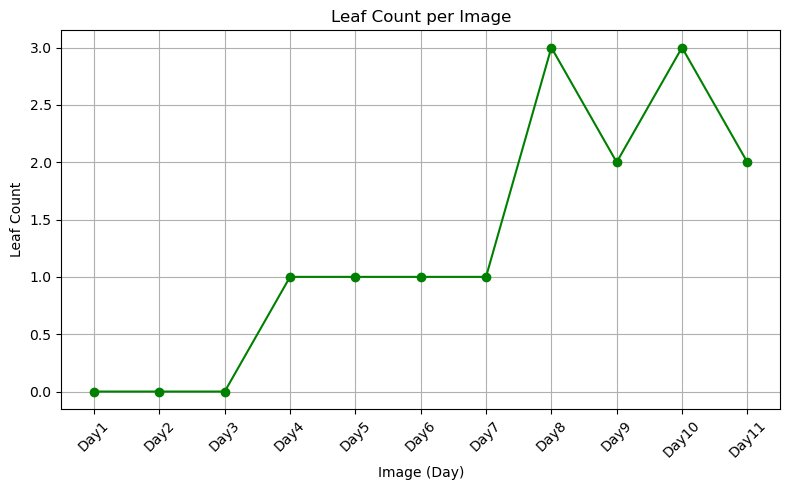

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import re

folder_path = r"Plant_Images\Leaf_Count"

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('(\d+)', s)]

image_files = sorted(
    [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))],
    key=natural_sort_key)

#Analyze and store data
leaf_counts = []
image_names = []

if not image_files:
    print("No images found in the folder.")
else:
    for image_file in image_files:
        full_image_path = os.path.join(folder_path, image_file)
        count = count_leaves(full_image_path, min_contour_area=150)
        leaf_counts.append(count)
        image_names.append(os.path.splitext(image_file)[0])  

def count_leaves(image_path, min_contour_area=100):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image from path: {image_path}")
        return 0

    image = cv2.resize(image, (600, 600))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_green = np.array([20, 40, 40])
    upper_green = np.array([75, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=3)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)

    # Contour detection
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]
    leaf_count = len(valid_contours)

    # Annotate image
    annotated_image = image.copy()
    for cnt in valid_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (0, 0, 255), 3)

    cv2.putText(annotated_image, f'Leaves: {leaf_count}', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    annotated_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    print(f'Total Leaves Counted in {os.path.basename(image_path)}: {leaf_count}')
    return leaf_count

if leaf_counts:
    plt.figure(figsize=(8, 5))
    plt.plot(image_names, leaf_counts, marker='o', linestyle='-', color='green')
    plt.xlabel("Image (Day)")
    plt.ylabel("Leaf Count")
    plt.title("Leaf Count per Image")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
